In [2]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('dataset.csv')
print(list(df.columns))
cols_to_drop = ['id','Title', 'Author','Pagecount','Autherkeywords','AuthorsID','Volume','Issue','Pagestart','Pageend','Indexkeywords','Source', 'ENTRYTYPE', 'doi', 'url','Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Publication_Stage', 'Access_Type', 'EID',]
new_df = df.drop(cols_to_drop, axis=1)

emb_dummies = pd.get_dummies(new_df['Document_Type'], drop_first=True, prefix='Document_Type')
new_df = pd.concat([new_df, emb_dummies], axis=1)
new_df.drop('Document_Type', axis=1, inplace=True)

year_dummies = pd.get_dummies(new_df['Year'], drop_first=True, prefix='Year')
new_df = pd.concat([new_df, year_dummies], axis=1)
new_df.drop('Year', axis=1, inplace=True)

new_df = new_df.fillna(0)
print(list(new_df.columns))

['id', 'primary', 'Title', 'Autherkeywords', 'Indexkeywords', 'Author', 'AuthorsID', 'Volume', 'Issue', 'Year', 'Pagestart', 'Pageend', 'Pagecount', 'Source', 'ENTRYTYPE', 'doi', 'url', 'citation_count', 'Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Document_Type', 'Publication_Stage', 'Access_Type', 'EID', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage']
['primary', 'citation_count', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage', 'Document_Type_Book Chapter', 'Document_Type_Conference Paper', 'Document_T

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   primary                         75 non-null     float64
 1   citation_count                  75 non-null     int64  
 2   ABSTRACT_VIEWS                  75 non-null     float64
 3   ALL_BLOG_COUNT                  75 non-null     float64
 4   CITED_BY_COUNT                  75 non-null     float64
 5   DOWNLOAD_COUNT                  75 non-null     float64
 6   EXPORTS_SAVES                   75 non-null     float64
 7   FACEBOOK_COUNT                  75 non-null     float64
 8   FULL_TEXT_VIEWS                 75 non-null     float64
 9   LINK_CLICK_COUNT                75 non-null     float64
 10  LINK_OUTS                       75 non-null     float64
 11  READER_COUNT                    75 non-null     float64
 12  REFERENCE_COUNT                 75 non

In [6]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_df.drop(labels=['primary'], axis=1),
    new_df['primary'],
    test_size=0.3,
    random_state=0)

In [7]:
X_train.head()

,citation_count,ABSTRACT_VIEWS,ALL_BLOG_COUNT,CITED_BY_COUNT,DOWNLOAD_COUNT,EXPORTS_SAVES,FACEBOOK_COUNT,FULL_TEXT_VIEWS,LINK_CLICK_COUNT,LINK_OUTS,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2015,Year_2016,Year_2017,Year_2018
4,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
65,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
48,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,540.0,0.0,10.0,0.0,18.0,0.0,0.0,0.0,43.0,...,0,0,0,0,0,0,0,0,0,1
45,4,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.09405631, 0.        , 0.        , 0.02350812, 0.        ,
       0.07241959, 0.        , 0.00986498, 0.        , 0.        ,
       0.06580743, 0.        , 0.        , 0.07481963, 0.05144839,
       0.00610975, 0.        , 0.        , 0.        , 0.01824946,
       0.0340357 , 0.        , 0.        , 0.02089953, 0.        ,
       0.        , 0.02976896, 0.02948824, 0.        , 0.        ,
       0.        , 0.        , 0.02828809])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

citation_count                    0.094056
capture                           0.074820
EXPORTS_SAVES                     0.072420
READER_COUNT                      0.065807
citation                          0.051448
Document_Type_Review              0.034036
Year_2010                         0.029769
Year_2011                         0.029488
Year_2018                         0.028288
CITED_BY_COUNT                    0.023508
Year_2007                         0.020900
Document_Type_Conference Paper    0.018249
FULL_TEXT_VIEWS                   0.009865
mention                           0.006110
Year_2015                         0.000000
ABSTRACT_VIEWS                    0.000000
ALL_BLOG_COUNT                    0.000000
DOWNLOAD_COUNT                    0.000000
Year_2016                         0.000000
FACEBOOK_COUNT                    0.000000
LINK_CLICK_COUNT                  0.000000
LINK_OUTS                         0.000000
REFERENCE_COUNT                   0.000000
Year_2006  

<AxesSubplot:>

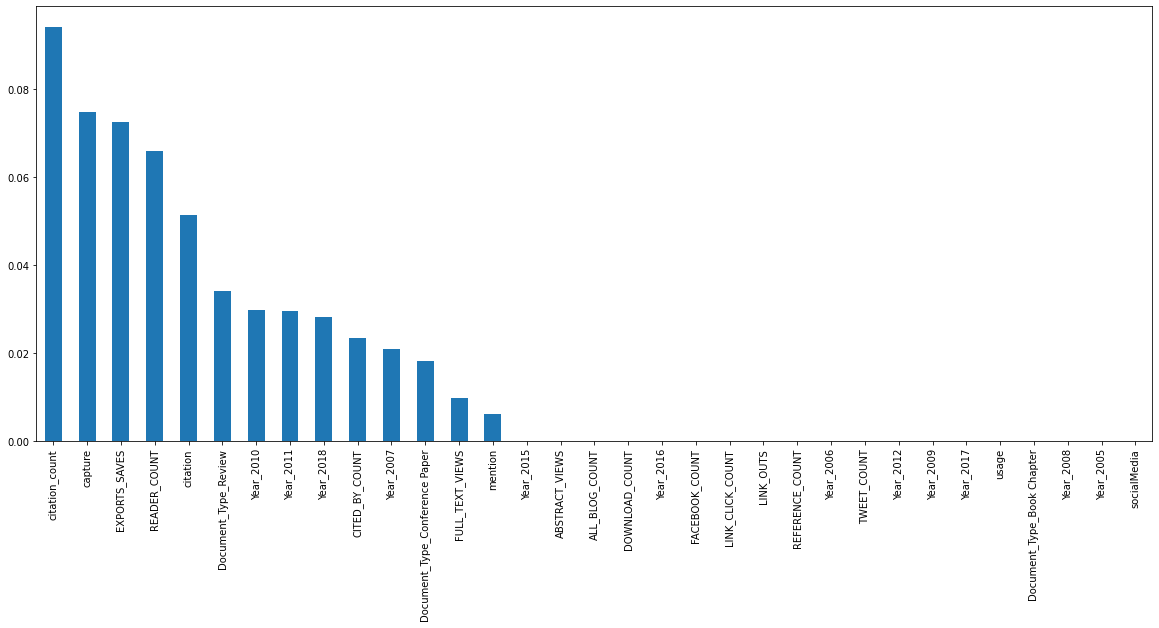

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['citation_count', 'LINK_CLICK_COUNT', 'capture', 'Year_2006',
       'Year_2009'],
      dtype='object')